## **Importing Libraries**

In [2]:
!pip install tld

  Using cached tld-0.13-py2.py3-none-any.whl (263 kB)


In [117]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.0/9.2 MB 388.9 kB/s eta 0:00:24
   ---------------------------------------- 0.1/9.2 MB 744.7 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.2 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.2/9.2 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.2 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.2 MB 1.6 MB/s eta 0:00:06
   -- -------------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/da/3c/3ff05c2855eee52588f489a4e607e4a61699a0742aa03ccf641c77f9eb0a/numpy-1.26.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.2 kB 129.6 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/61.2 kB 129.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.2 kB 178.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 232.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB 1.4 MB/s eta 0:00:12
   ----------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

## **Loading Dataset**

In [26]:
data = pd.read_csv(r"E:\vs code\Datasets\malicious_phish.csv")
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [28]:
data.shape

(651191, 2)

In [29]:
data['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

## **Preprocessing**

In [30]:
data.isna().sum()

url     0
type    0
dtype: int64

In [31]:
data.duplicated().sum()

10066

In [32]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [33]:
data.shape

(641125, 2)

In [34]:
count = data['type'].value_counts()
count

type
benign        428080
defacement     95308
phishing       94092
malware        23645
Name: count, dtype: int64

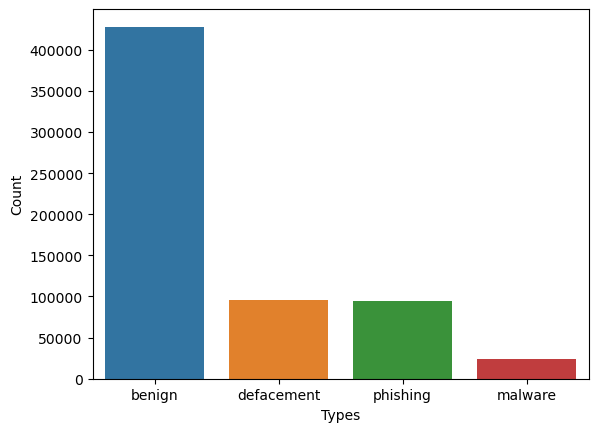

In [58]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

#### first have to omit the (www.) from the URL which is in fact a sub domain in itself.


In [37]:
data['url'][90]

'http://www.parafiapiaski.pl/index.php?option=com_user&view=remind'

In [42]:
data['url'] = data['url'].replace('www.', '', regex=True)
data['url'][90]

'http://parafiapiaski.pl/index.php?option=com_user&view=remind'

In [43]:
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [46]:
labels = {'Category': {'benign':0, 'defacement': 1, 'phishing':2, 'malware':3} }
data['Category'] = data['type']
data = data.replace(labels)

data.head()

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


## **Feature Extraction**

In [47]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))
data.head()

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


#### Extract the top-level domain (TLD) from the URL

In [48]:
def process_tld(url):
    try:
        result = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        primary_domain= result.parsed_url.netloc
    except :
        primary_domain= None
    return primary_domain

# as_object=True: Specifies that the result should be returned as an object.
# fail_silently=False: If set to False, the function will raise an exception if it fails to extract the TLD.
# fix_protocol=True: Tries to fix the URL protocol if missing.

In [50]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net


In [51]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for i in feature:
    data[i]  = data['url'].apply(lambda x: x.count(i))
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [52]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

In [54]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1


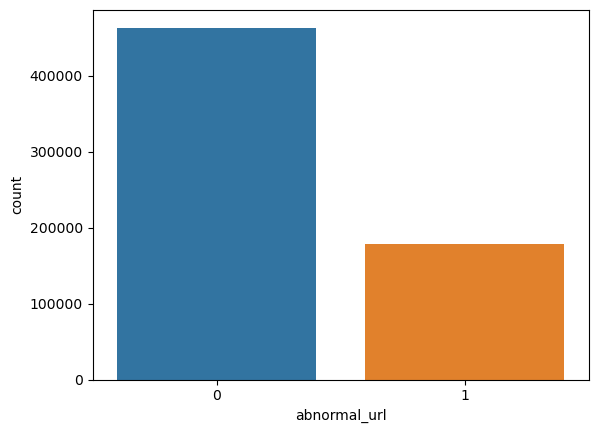

In [57]:
sns.countplot(x='abnormal_url', data=data);

In [59]:
def httpSecure(url):
    http = urlparse(url).scheme      # http or https
    match = str(http)
    if match=='https':
        return 1
    else:
        return 0

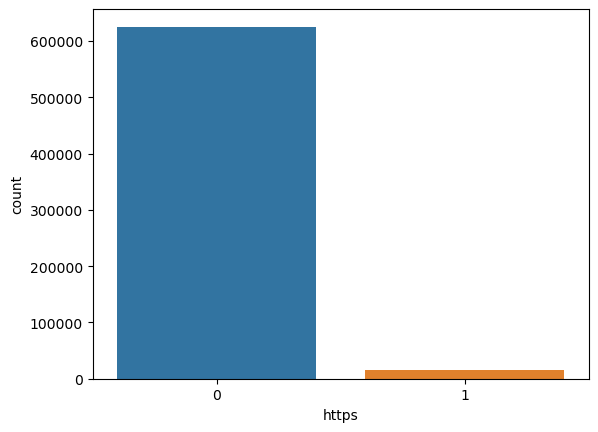

In [60]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))
sns.countplot(x='https', data=data);

####  Counts the number of digit characters in a URL


In [64]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits

In [65]:
data['digits']= data['url'].apply(lambda i: digit_count(i))
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,%,+,$,!,*,",",//,abnormal_url,https,digits
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,0,1,1,0,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,0,1,1,0,22


#### Counts the number of letter characters in a URL


In [66]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters

In [67]:
data['letters']= data['url'].apply(lambda i: letter_count(i))
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,1,1,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,1,1,0,22,199


#### Checks to see whether URL contains a shortening service

In [68]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

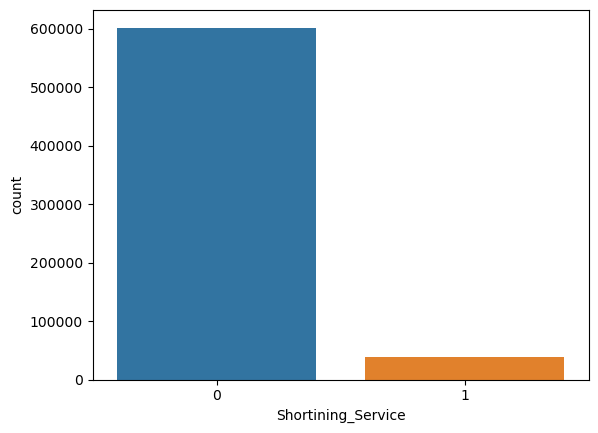

In [69]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))
sns.countplot(x='Shortining_Service', data=data);

#### checks whether URL contains patterns associated with IP addresses (both IPv4 and IPv6). 

In [70]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [71]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
data['having_ip_address'].value_counts()

having_ip_address
0    628648
1     12477
Name: count, dtype: int64

In [142]:
url = {'url': ['kdjhfd']}
df = pd.DataFrame(url)
df

,url
0,kdjhfd


## Train Test Split

In [73]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Training models

### Decision Tree Classifier

In [93]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

Test Accuracy :  90.65%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     85461
           1       0.93      0.96      0.94     19189
           2       0.80      0.56      0.66     18898
           3       0.92      0.87      0.89      4677

    accuracy                           0.91    128225
   macro avg       0.89      0.84      0.86    128225
weighted avg       0.90      0.91      0.90    128225

             Confusion_matrix 


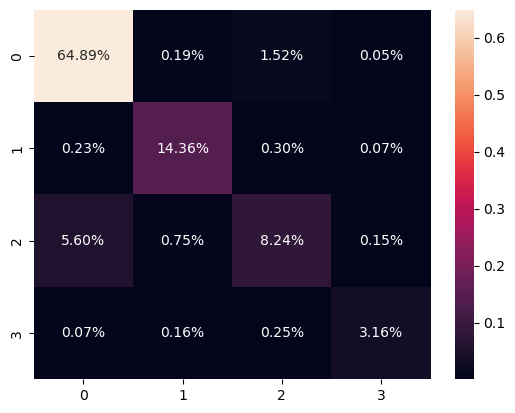

In [94]:
DT_pred =  DT.predict(X_test)
DT_accuracy = accuracy_score(DT_pred, y_test)

print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(DT_accuracy*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, DT_pred))
print('\033[01m             Confusion_matrix \033[0m')
DT_cf_matrix = confusion_matrix(y_test, DT_pred)
plot_ = sns.heatmap(DT_cf_matrix/np.sum(DT_cf_matrix), annot=True,fmt= '0.2%')
plt.show()

### Random Forest Classifier

In [99]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

Test Accuracy :  91.20%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85461
           1       0.93      0.97      0.95     19189
           2       0.83      0.57      0.67     18898
           3       0.95      0.87      0.91      4677

    accuracy                           0.91    128225
   macro avg       0.91      0.84      0.87    128225
weighted avg       0.91      0.91      0.91    128225

             Confusion_matrix 


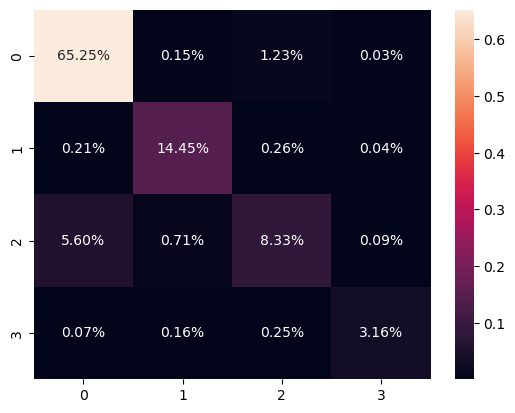

In [100]:
RF_pred =  RF.predict(X_test)
RF_accuracy = accuracy_score(RF_pred, y_test)

print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(RF_accuracy*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, RF_pred))
print('\033[01m             Confusion_matrix \033[0m')
RF_cf_matrix = confusion_matrix(y_test, RF_pred)
plot_ = sns.heatmap(RF_cf_matrix/np.sum(RF_cf_matrix), annot=True,fmt= '0.2%')
plt.show()

### Ada Boost Classifier

In [97]:
AB = AdaBoostClassifier()
AB.fit(X_train,y_train)

AdaBoostClassifier()

Test Accuracy :  81.85%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     85461
           1       0.84      0.91      0.87     19189
           2       0.38      0.14      0.21     18898
           3       0.94      0.14      0.24      4677

    accuracy                           0.82    128225
   macro avg       0.75      0.54      0.56    128225
weighted avg       0.78      0.82      0.78    128225

             Confusion_matrix 


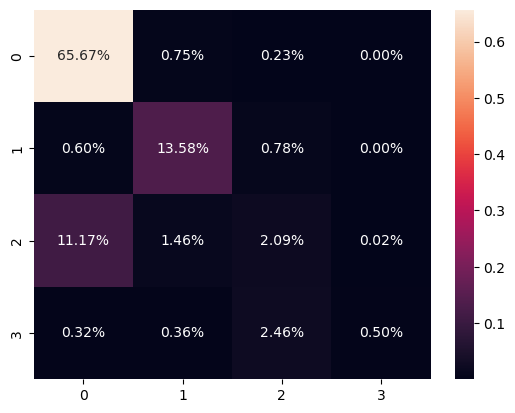

In [98]:
AB_pred =  AB.predict(X_test)
AB_accuracy = accuracy_score(AB_pred, y_test)

print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(AB_accuracy*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, AB_pred))
print('\033[01m             Confusion_matrix \033[0m')
AB_cf_matrix = confusion_matrix(y_test, AB_pred)
plot_ = sns.heatmap(AB_cf_matrix/np.sum(AB_cf_matrix), annot=True,fmt= '0.2%')
plt.show()

### SGD (stochastic gradient descent) Classifier

In [104]:
SGD = SGDClassifier()
SGD.fit(X_train,y_train)

SGDClassifier()

Test Accuracy :  82.33%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     85461
           1       0.78      0.96      0.86     19189
           2       0.43      0.05      0.09     18898
           3       0.78      0.77      0.78      4677

    accuracy                           0.82    128225
   macro avg       0.71      0.69      0.66    128225
weighted avg       0.77      0.82      0.77    128225

             Confusion_matrix 


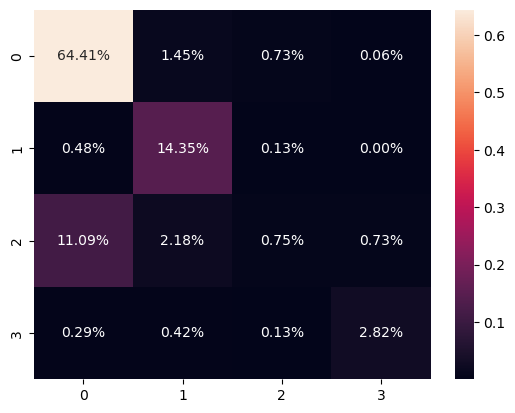

In [105]:
SGD_pred = SGD.predict(X_test)
SGD_accuracy = accuracy_score(SGD_pred, y_test)

print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(SGD_accuracy*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, SGD_pred))
print('\033[01m             Confusion_matrix \033[0m')
SGD_cf_matrix = confusion_matrix(y_test, SGD_pred)
plot_ = sns.heatmap(SGD_cf_matrix/np.sum(SGD_cf_matrix), annot=True,fmt= '0.2%')
plt.show()

### Extra Trees Classifier

In [106]:
ET = ExtraTreesClassifier()
ET.fit(X_train,y_train)

ExtraTreesClassifier()

Test Accuracy :  91.16%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85461
           1       0.93      0.97      0.95     19189
           2       0.83      0.56      0.67     18898
           3       0.95      0.87      0.91      4677

    accuracy                           0.91    128225
   macro avg       0.91      0.84      0.87    128225
weighted avg       0.91      0.91      0.90    128225

             Confusion_matrix 


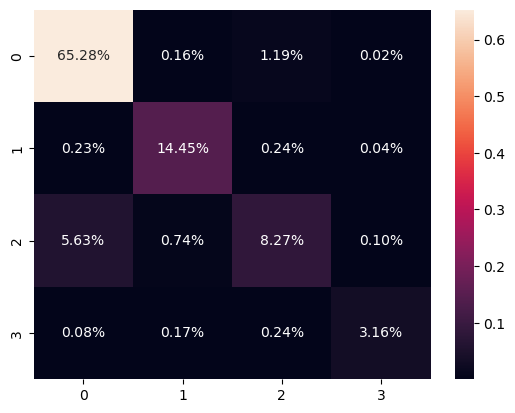

In [107]:
ET_pred = ET.predict(X_test)
ET_accuracy = accuracy_score(ET_pred, y_test)

print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(ET_accuracy*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, ET_pred))
print('\033[01m             Confusion_matrix \033[0m')
ET_cf_matrix = confusion_matrix(y_test, ET_pred)
plot_ = sns.heatmap(ET_cf_matrix/np.sum(ET_cf_matrix), annot=True,fmt= '0.2%')
plt.show()

### Naive Bayes Classifier 

In [108]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

Test Accuracy :  80.17%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.93      0.88     85461
           1       0.69      1.00      0.81     19189
           2       0.64      0.04      0.07     18898
           3       0.67      0.80      0.73      4677

    accuracy                           0.80    128225
   macro avg       0.71      0.69      0.62    128225
weighted avg       0.78      0.80      0.75    128225

             Confusion_matrix 


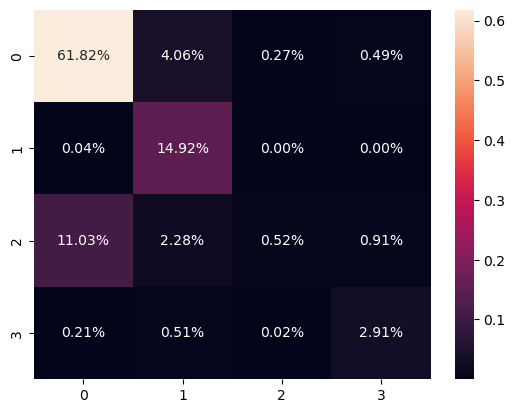

In [109]:
NB_pred = NB.predict(X_test)
NB_accuracy = accuracy_score(NB_pred, y_test)

print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(NB_accuracy*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, NB_pred))
print('\033[01m             Confusion_matrix \033[0m')
NB_cf_matrix = confusion_matrix(y_test, NB_pred)
plot_ = sns.heatmap(NB_cf_matrix/np.sum(NB_cf_matrix), annot=True,fmt= '0.2%')
plt.show()

## Final Report

In [123]:
accuracies = [DT_accuracy,RF_accuracy,AB_accuracy,SGD_accuracy,ET_accuracy,NB_accuracy]
accuracy_test=[]

for i in accuracies:
    accuracy_test.append(i)

In [124]:
output = pd.DataFrame({"Model":['Decision Tree Classifier', 'Random Forest Classifier',
                                'AdaBoost Classifier', 'SGD Classifier',
                                'Extra Trees Classifier', 'Gaussian NB'],
                      "Accuracy":accuracy_test})
output

,Model,Accuracy
0,Decision Tree Classifier,0.906539
1,Random Forest Classifier,0.911975
2,AdaBoost Classifier,0.818507
3,SGD Classifier,0.823272
4,Extra Trees Classifier,0.911647
5,Gaussian NB,0.801708


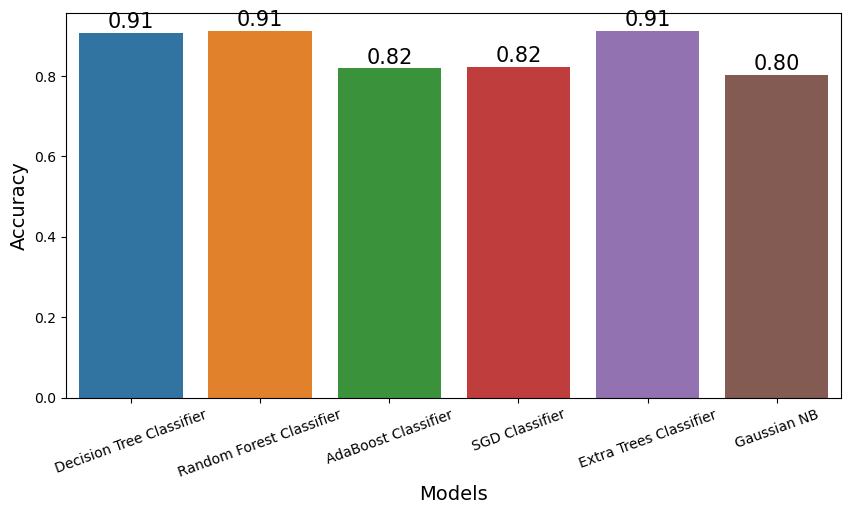

In [125]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

## Testing

In [249]:
data['url'][X_test.index[123456:346333]]

521044                   http://wwbb.aplicativobbonline.com
310172    http://confirmation-account-apple.marijuanafig...
17029                   logicalleadguitar.com/magazine/?p=9
43892     http://andriacambia.it/index.php?option=com_ma...
254580    http://nesn.com/2014/09/jermaine-wiggins-pats-...
                                ...                        
572111    esxcc.com/js/index.htm?us.battle.net/login/en/...
602141                  comprapremiada.site50.net/cadastro/
604903                            users.erols.com/lnstudio/
139739    http://lacos.de/cms_neu/index.php?option=com_c...
638111              jade-designs.org/writersring/index.html
Name: url, Length: 4769, dtype: object

In [254]:
data['url'][572111] , data['type'][572111]

('esxcc.com/js/index.htm?us.battle.net/login/en/?ref=xftsknwus.battle.net/d3/en/index',
 'benign')

In [255]:
# New URL for testing
new_url = "esxcc.com/js/index.htm?us.battle.net/login/en/?ref=xftsknwus.battle.net/d3/en/index"

# Preprocess the new URL
url_len = len(new_url)
domain = process_tld(new_url)
abnormal_url_flag = abnormal_url(new_url)
https_flag = httpSecure(new_url)
digits_count = digit_count(new_url)
letters_count = letter_count(new_url)
shortening_service_flag = Shortining_Service(new_url)
having_ip_address_flag = having_ip_address(new_url)


# Create a DataFrame for the new URL
new_url_data = pd.DataFrame({'url_len': [url_len]})

feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for i in feature:
    new_url_data[i]  = new_url.count(i)
        
new_url_data['abnormal_url'] = abnormal_url_flag
new_url_data['https'] = https_flag
new_url_data['digits'] = digits_count
new_url_data['letters'] = letters_count
new_url_data['Shortining_Service'] = shortening_service_flag
new_url_data['having_ip_address'] = having_ip_address_flag

In [256]:
# Predict with the trained Random Forest model
new_url_prediction = RF.predict(new_url_data)

In [257]:
# Display the result
categories = {0: 'benign', 1: 'defacement', 2: 'phishing', 3: 'malware'}
predicted_category = categories[new_url_prediction[0]]
print(f"The predicted category for the new URL is: {predicted_category}")

The predicted category for the new URL is: benign
